In [25]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


In [16]:
data_path = 'data/training/'
image_file = os.path.join(data_path, r'patient001/patient001_frame01.nii.gz')
gt_file = os.path.join(data_path, r'patient001/patient001_frame01_gt.nii.gz')


In [17]:
image = sitk.ReadImage(image_file)
gt = sitk.ReadImage(gt_file)

In [18]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())

(216, 256, 10)
(0.0, 0.0, 0.0)
(1.5625, 1.5625, 10.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [19]:
image_array = sitk.GetArrayFromImage(image)
image_array = np.swapaxes(image_array, 0, 2)
gt = sitk.GetArrayFromImage(gt)
gt = np.swapaxes(gt, 0, 2)

print(image_array.shape) # New shape: (512, 512, 64)
print(image.GetSpacing()) # (horizontal, vertical, slice) spacings respectively in mm


(216, 256, 10)
(1.5625, 1.5625, 10.0)


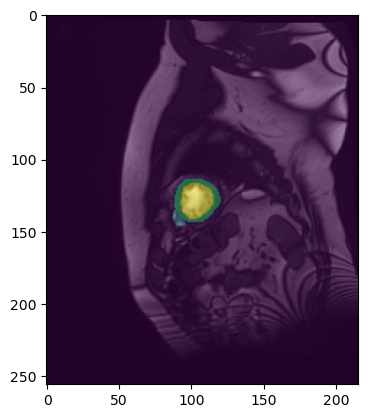

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(image_array.shape[2]):
    ax.imshow(image_array[:, :, i].transpose(), cmap='gray')
    ax.imshow(gt[:, :, i].transpose(), alpha=0.5)
    display(fig)
    clear_output(wait=True)
    plt.pause(0.1)


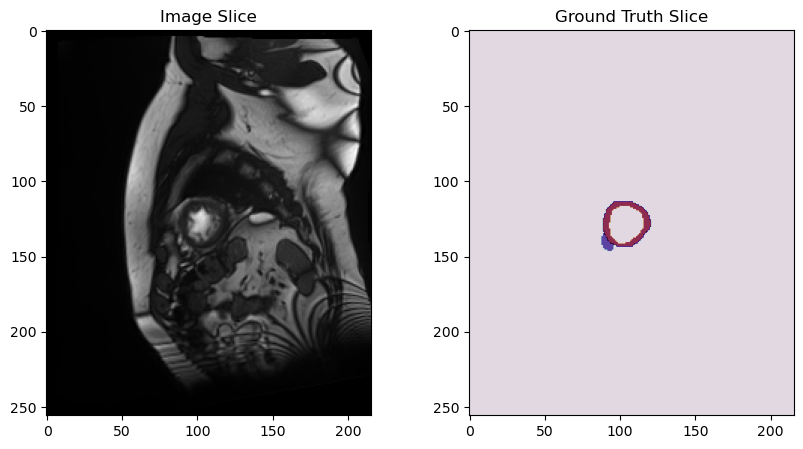

In [42]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 


for i in range(image_array.shape[2]):
    ax1.clear()
    ax2.clear()

    ax1.imshow(image_array[:, :, i].transpose(), cmap='gray')
    ax1.title.set_text('Image Slice')

    ax2.imshow(gt[:, :, i].transpose(), cmap='twilight')
    ax2.title.set_text('Ground Truth Slice')
    if i == 3:
        plt.savefig('figure_.png')    
    display(fig)

    clear_output(wait=True)
    plt.pause(0.1)


plt.close(fig) 

In [45]:
import matplotlib.pyplot as plt

# Define the index of the slice you want to save
slice_index = 3

# Create a new figure for saving purposes
fig_save, (ax1_save, ax2_save) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image slice
ax1_save.imshow(image_array[:, :, slice_index].transpose(), cmap='gray')
ax1_save.title.set_text('Image Slice')

# Plot the ground truth slice
ax2_save.imshow(gt[:, :, slice_index].transpose(), cmap='twilight')
ax2_save.title.set_text('Ground Truth Slice')

#add tittle
plt.suptitle('Patient 001 Frame 01 Slice 3')

# Save the figure
plt.savefig('figure_.png', bbox_inches='tight')
plt.close(fig_save)  # Close the figure after saving to free up memory
